# Install Necessary Packages

In [ ]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 7.5 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633965 sha256=726bc1403a76f5a02cfe2f7b9c902f3b5c41bd0844afeb27585db8cd0d3d26fa
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
!pip install recmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 10.4 MB/s 
     |████████████████████████████████| 11.2 MB 46.0 MB/s 
     |████████████████████████████████| 13.2 MB 44.1 MB/s 
     |████████████████████████████████| 1.6 MB 47.2 MB/s 
     |████████████████████████████████| 121 kB 72.6 MB/s 
     |████████████████████████████████| 965 kB 54.2 MB/s 
     |████████████████████████████████| 210 kB 46.3 MB/s 
     |████████████████████████████████| 316 kB 41.4 MB/s 
     |████████████████████████████████| 140 kB 21.7 MB/s 
     |████████████████████████████████| 54 kB 1.6 MB/s 
     |████████████████████████████████| 237 kB 36.3 MB/s 
     |████████████████████████████████| 48 kB 5.1 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 51 kB 5.1 MB/s 
     |████████████████████████████████| 4.0 MB 7.6 MB/s 
     |████████████████████████████████

# Import Necessary Packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
import recmetrics

# Load MovieLens Dataset

In [ ]:
!wget -nc http://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip -n ml-100k.zip

File ‘ml-100k.zip’ already there; not retrieving.

Archive:  ml-100k.zip


In [ ]:
column_names = ['userId','movieId','rating','timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t',header=None,names=column_names)
ratings.reset_index(drop=True, inplace=True)

In [ ]:
users = ratings["userId"].value_counts()

In [ ]:
users

405    737
655    685
13     636
450    540
276    518
      ... 
441     20
36      20
812     20
895     20
93      20
Name: userId, Length: 943, dtype: int64

In [ ]:
print(ratings.shape)
ratings.head(3)

(100000, 4)


,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116


In [ ]:
rated_movies = ratings["movieId"].tolist()
d = 'movieId | title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western'
column_names2 = d.split(' | ')
movies = pd.read_csv('ml-100k/u.item', sep='|',header=None,names=column_names2,encoding='latin-1')
movies.head()

,movieId,title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.25)

# Collaborative Filtering Example - SVD

SVD has not been studied in detail and is only implemented with the SurpriseLib package as a standard to compare the baselines against.

In [ ]:
algo = SVD()
algo.fit(trainset)

In [ ]:
test = algo.test(testset)
test

[Prediction(uid=802, iid=201, r_ui=4.0, est=3.8165025287999823, details={'was_impossible': False}),
 Prediction(uid=508, iid=13, r_ui=4.0, est=3.3478145757741298, details={'was_impossible': False}),
 Prediction(uid=807, iid=484, r_ui=4.0, est=4.192847362928449, details={'was_impossible': False}),
 Prediction(uid=279, iid=83, r_ui=5.0, est=3.958012245326997, details={'was_impossible': False}),
 Prediction(uid=122, iid=180, r_ui=5.0, est=4.047337545135988, details={'was_impossible': False}),
 Prediction(uid=311, iid=322, r_ui=4.0, est=3.548949724584658, details={'was_impossible': False}),
 Prediction(uid=629, iid=271, r_ui=4.0, est=3.5294568906946395, details={'was_impossible': False}),
 Prediction(uid=293, iid=238, r_ui=4.0, est=3.810251948933387, details={'was_impossible': False}),
 Prediction(uid=907, iid=405, r_ui=4.0, est=4.71792431077574, details={'was_impossible': False}),
 Prediction(uid=773, iid=958, r_ui=4.0, est=3.3059832217515495, details={'was_impossible': False}),
 Predicti

In [ ]:
test = pd.DataFrame(test)
test.drop("details", inplace=True, axis=1)
test.columns = ['userId', 'movieId', 'actual', 'cf_predictions']
test.head()

,userId,movieId,actual,cf_predictions
0,802,201,4.0,3.816503
1,508,13,4.0,3.347815
2,807,484,4.0,4.192847
3,279,83,5.0,3.958012
4,122,180,5.0,4.047338


In [ ]:
print("MSE: ", recmetrics.mse(test.actual, test.cf_predictions))
print("RMSE: ", recmetrics.rmse(test.actual, test.cf_predictions))

MSE:  0.8845981259486441
RMSE:  0.9405307682094425


In [ ]:
#create model (matrix of predicted values)
cf_model = test.pivot_table(index='userId', columns='movieId', values='cf_predictions').fillna(0)

In [ ]:
#create a dictioanry mapping movie IDs to titles so as to get interpretable results.
movies_list = list(movies['title'])
movie_dict = {index : movie for index, movie in enumerate(movies_list)}

In [ ]:
#Function to predict top n movies for a user
def get_users_predictions(userId, n, model):
    recommended_items = pd.DataFrame(model.loc[userId])
    recommended_items.columns = ["predicted_rating"]
    recommended_items = recommended_items.sort_values('predicted_rating', ascending=False)    
    recommended_items = recommended_items.head(n)  
    return recommended_items.index.tolist()

In [ ]:
test = test.copy().groupby('userId', as_index=False)['movieId'].agg({'actual': (lambda x: list(set(x)))})

In [ ]:
test = test.set_index("userId")

In [ ]:
# make recommendations for all members in the test data
cf_recs = [] = []
for user in test.index:
    cf_predictions = get_users_predictions(user, 10, cf_model)
    cf_recs.append(cf_predictions)
        
test['cf_predictions'] = cf_recs
test.head()

,actual,cf_predictions
userId,,
1,"[128, 1, 130, 2, 260, 131, 132, 135, 265, 11, ...","[50, 64, 209, 174, 135, 98, 180, 223, 132, 246]"
2,"[288, 257, 1, 258, 100, 293, 296, 276, 278, 31...","[313, 258, 1, 100, 257, 288, 282, 293, 296, 310]"
3,"[258, 272, 300, 303, 181, 321, 323, 324, 325, ...","[272, 300, 258, 181, 303, 341, 334, 337, 345, ..."
4,"[288, 356, 357, 327, 360, 362, 300, 50]","[50, 357, 327, 356, 300, 360, 288, 362, 1007, ..."
5,"[1, 2, 393, 394, 139, 398, 404, 405, 406, 407,...","[428, 98, 181, 1, 208, 176, 209, 382, 432, 183]"


# Popularity Recommender

Recommends the movies with the largest number of ratings to all the users in the dataset (non-personalised recommendations).

In [ ]:
#make recommendations for all members in the test data
popularity_recs = ratings.movieId.value_counts().head(10).index.tolist()

pop_recs = []
for user in test.index:
    pop_predictions = popularity_recs
    pop_recs.append(pop_predictions)
        
test['pop_predictions'] = pop_recs
test.head()

,actual,cf_predictions,pop_predictions
userId,,,
1,"[128, 1, 130, 2, 260, 131, 132, 135, 265, 11, ...","[50, 64, 209, 174, 135, 98, 180, 223, 132, 246]","[50, 258, 100, 181, 294, 286, 288, 1, 300, 121]"
2,"[288, 257, 1, 258, 100, 293, 296, 276, 278, 31...","[313, 258, 1, 100, 257, 288, 282, 293, 296, 310]","[50, 258, 100, 181, 294, 286, 288, 1, 300, 121]"
3,"[258, 272, 300, 303, 181, 321, 323, 324, 325, ...","[272, 300, 258, 181, 303, 341, 334, 337, 345, ...","[50, 258, 100, 181, 294, 286, 288, 1, 300, 121]"
4,"[288, 356, 357, 327, 360, 362, 300, 50]","[50, 357, 327, 356, 300, 360, 288, 362, 1007, ...","[50, 258, 100, 181, 294, 286, 288, 1, 300, 121]"
5,"[1, 2, 393, 394, 139, 398, 404, 405, 406, 407,...","[428, 98, 181, 1, 208, 176, 209, 382, 432, 183]","[50, 258, 100, 181, 294, 286, 288, 1, 300, 121]"


# Random Recommender

In [ ]:
#make recommendations for all members in the test data

ran_recs = []
for user in test.index:
    random_predictions = ratings.movieId.sample(10).values.tolist()
    ran_recs.append(random_predictions)
        
test['random_predictions'] = ran_recs
test.head()

,actual,cf_predictions,pop_predictions,random_predictions
userId,,,,
1,"[128, 1, 130, 2, 260, 131, 132, 135, 265, 11, ...","[50, 64, 209, 174, 135, 98, 180, 223, 132, 246]","[50, 258, 100, 181, 294, 286, 288, 1, 300, 121]","[325, 131, 582, 8, 88, 121, 12, 623, 720, 484]"
2,"[288, 257, 1, 258, 100, 293, 296, 276, 278, 31...","[313, 258, 1, 100, 257, 288, 282, 293, 296, 310]","[50, 258, 100, 181, 294, 286, 288, 1, 300, 121]","[685, 517, 496, 304, 1327, 470, 1524, 1044, 46..."
3,"[258, 272, 300, 303, 181, 321, 323, 324, 325, ...","[272, 300, 258, 181, 303, 341, 334, 337, 345, ...","[50, 258, 100, 181, 294, 286, 288, 1, 300, 121]","[475, 448, 802, 631, 65, 368, 179, 258, 478, 716]"
4,"[288, 356, 357, 327, 360, 362, 300, 50]","[50, 357, 327, 356, 300, 360, 288, 362, 1007, ...","[50, 258, 100, 181, 294, 286, 288, 1, 300, 121]","[286, 826, 423, 96, 480, 258, 745, 19, 292, 619]"
5,"[1, 2, 393, 394, 139, 398, 404, 405, 406, 407,...","[428, 98, 181, 1, 208, 176, 209, 382, 432, 183]","[50, 258, 100, 181, 294, 286, 288, 1, 300, 121]","[1, 161, 761, 435, 1591, 56, 663, 940, 492, 642]"


## Get Movie Recommendations for a given User using Random Recommender

In [ ]:
random_recommender = test._get_value(5, 'random_predictions')
for i in random_recommender:
  print(movie_dict[i])

GoldenEye (1995)
On Golden Pond (1981)
Beautiful Girls (1996)
American Werewolf in London, An (1981)
Magic Hour, The (1998)
Priest (1994)
Paris, Texas (1984)
With Honors (1994)
Thin Man, The (1934)
The Innocent (1994)


## Get Movie Recommendations for a given User using Popularity Recommender

In [ ]:
popularity_recommender = test._get_value(5, 'pop_predictions')
for i in popularity_recommender:
  print(movie_dict[i])

Legends of the Fall (1994)
George of the Jungle (1997)
Heavy Metal (1981)
GoodFellas (1990)
Breakdown (1997)
Marvin's Room (1996)
Evita (1996)
GoldenEye (1995)
In & Out (1997)
Cable Guy, The (1996)


## Get Movie Recommendations for a given User using SVD

In [ ]:
# get example prediction
for i in get_users_predictions(5, 10, cf_model):
  print(movie_dict[i])

Day the Earth Stood Still, The (1951)
Snow White and the Seven Dwarfs (1937)
GoodFellas (1990)
GoldenEye (1995)
This Is Spinal Tap (1984)
Good, The Bad and The Ugly, The (1966)
Indiana Jones and the Last Crusade (1989)
Flintstones, The (1994)
Heathers (1989)
Army of Darkness (1993)


# Mean Average Recall at K

A recommender system typically produces an ordered list of recommendations for each user in the test set. Recall at cutoff k: r(k), is simply the recall calculated by considering only the subset of your recommendations from rank 1 through k. MAR@K gives insight into how well the recommender is able to recall all the items the user has rated positively in the test set. 

recommender system recall: r= # of our recommendations that are relevant ÷ # of all the possible relevant items

An item is considered relevant if its true rating $r_{ui}$ is greater than a given threshold. An item is considered recommended if its estimated rating 
$\hat{r_{ui}}$ is greater than the threshold, and if it is among the k highest estimated ratings.

In [ ]:
actual = test.actual.values.tolist()
cf_predictions = test.cf_predictions.values.tolist()
pop_predictions = test.pop_predictions.values.tolist()
random_predictions = test.random_predictions.values.tolist()

In [ ]:
pop_mark = []
for K in np.arange(1, 11):
    pop_mark.extend([recmetrics.mark(actual, pop_predictions, k=K)])
pop_mark

[0.008521626636607738,
 0.01465921245393359,
 0.018008745410654427,
 0.020162949360964827,
 0.023108809056002873,
 0.02549495594820297,
 0.027806504585519295,
 0.029142668600452885,
 0.03056585609918151,
 0.032016684594723246]

In [ ]:
random_mark = []
for K in np.arange(1, 11):
    random_mark.extend([recmetrics.mark(actual, random_predictions, k=K)])
random_mark

[0.0024613681896000538,
 0.0034871184000812017,
 0.0043516717182778865,
 0.004813199505944472,
 0.005212279574583992,
 0.00565691547212025,
 0.0059350382339390835,
 0.006302997905828678,
 0.006579590969733782,
 0.006857824085678407]

In [ ]:
cf_mark = []
for K in np.arange(1, 11):
    cf_mark.extend([recmetrics.mark(actual, cf_predictions, k=K)])
cf_mark

[0.08323527701048522,
 0.16540785476485992,
 0.24492368437895837,
 0.3223141154808357,
 0.39040592809174607,
 0.45042122635621645,
 0.5022891636571729,
 0.543985550935357,
 0.5793057426768782,
 0.6109655258695742]

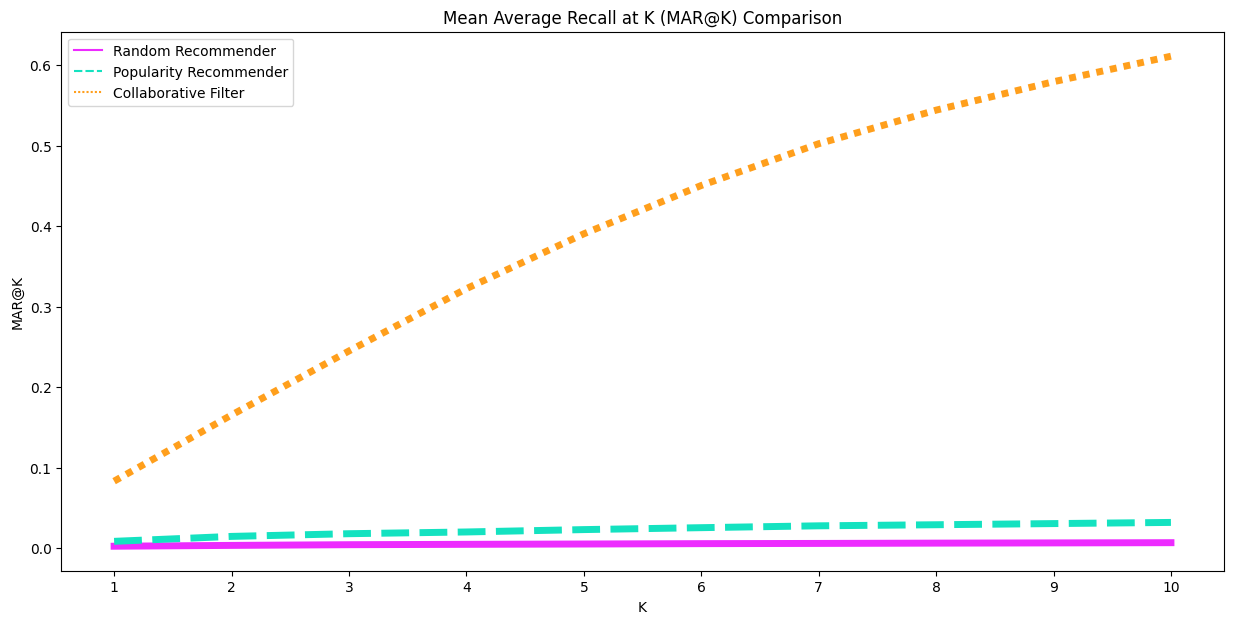

In [ ]:
mark_scores = [random_mark, pop_mark, cf_mark]
index = range(1,10+1)
names = ['Random Recommender', 'Popularity Recommender', 'Collaborative Filter']

fig = plt.figure(figsize=(15, 7))
recmetrics.mark_plot(mark_scores, model_names=names, k_range=index)

# Coverage

Coverage is the percent of items in the training data the model is able to recommend on a test set. Coverage is the percent of items that the recommender is able to recommend. It is depicted by this formula.


$$ \frac{I}{N} \cdot 100 \%$$

Where 'I' is the number of unique items the model recommends in the test data, and 'N' is the total number of unique items in the training data. 

In [ ]:
catalog = ratings.movieId.unique().tolist()
random_coverage = recmetrics.prediction_coverage(ran_recs, catalog)
pop_coverage = recmetrics.prediction_coverage(pop_recs, catalog)
cf_coverage = recmetrics.prediction_coverage(cf_recs, catalog)

In [ ]:
cf_coverage

48.45

In [ ]:
pop_coverage

0.59

In [ ]:
random_coverage

72.65

# Coverage Plot

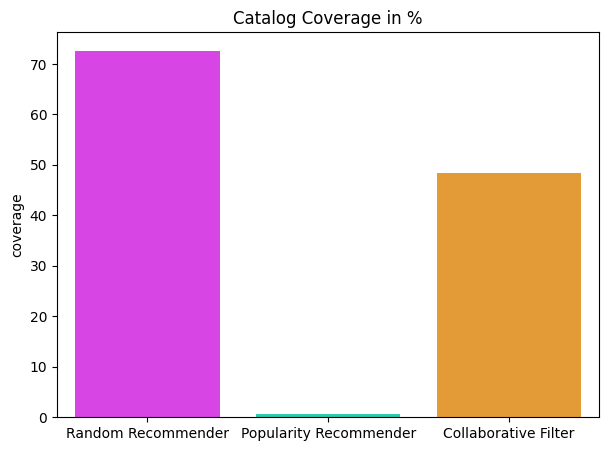

In [ ]:
# plot of prediction coverage
coverage_scores = [random_coverage, pop_coverage, cf_coverage]
model_names = ['Random Recommender', 'Popularity Recommender', 'Collaborative Filter']

fig = plt.figure(figsize=(7, 5))
recmetrics.coverage_plot(coverage_scores, model_names)

The random recommender has high percent of coverage (73.31%) as expected. the popularity recommender has only about 0.5% coverage, since it only ever recommends 10 items. The collaborative filter is only able to recommend close to 50% of the items it was trained on.